<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiments/GAN_Experiment_Combine_CWRU_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hashaninimeshika","key":"95beb196deca7c93b02c84e31a9057d8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brjapon/cwru-bearing-datasets

 62% 25.0M/40.4M [00:00<00:00, 58.5MB/s]
100% 40.4M/40.4M [00:00<00:00, 72.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/cwru-bearing-datasets.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/feature_time_48k_2048_load_1.csv')

In [ ]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


# **Pure Data**

In [ ]:
df = df.drop('fault', axis=1)


In [ ]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085
...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672


In [ ]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

## **Noisy Data**

In [ ]:
noisy_df = gaussian_noise(df, mu,std)

In [ ]:
noisy_df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.263836,-0.478999,-0.042838,0.043245,0.136456,0.037292,0.093812,2.834705,6.864180
1,0.422624,-0.286640,-0.016287,0.080336,0.187154,0.187123,-0.064027,3.442941,6.049140
2,0.470606,-0.371190,0.107685,0.185612,0.232907,-0.152294,-0.341667,2.834683,7.497701
3,0.531773,-0.510455,0.172765,0.220894,0.243183,0.076096,0.048936,3.889300,7.530898
4,0.415350,-0.628555,0.086770,0.203597,0.027631,-0.129284,0.402958,3.407143,6.196283
...,...,...,...,...,...,...,...,...,...
2295,0.184770,-0.042932,-0.092312,0.046852,0.038037,-0.049933,-0.261233,3.106585,6.208353
2296,0.250016,-0.149327,-0.022638,0.186008,0.111087,0.019303,-0.094967,3.079813,5.299444
2297,0.234301,-0.105892,0.095015,0.063754,-0.115735,-0.102153,0.079649,3.070856,5.574455
2298,0.204560,-0.212005,-0.035760,0.031381,0.348608,-0.268030,-0.011538,3.167333,5.360949


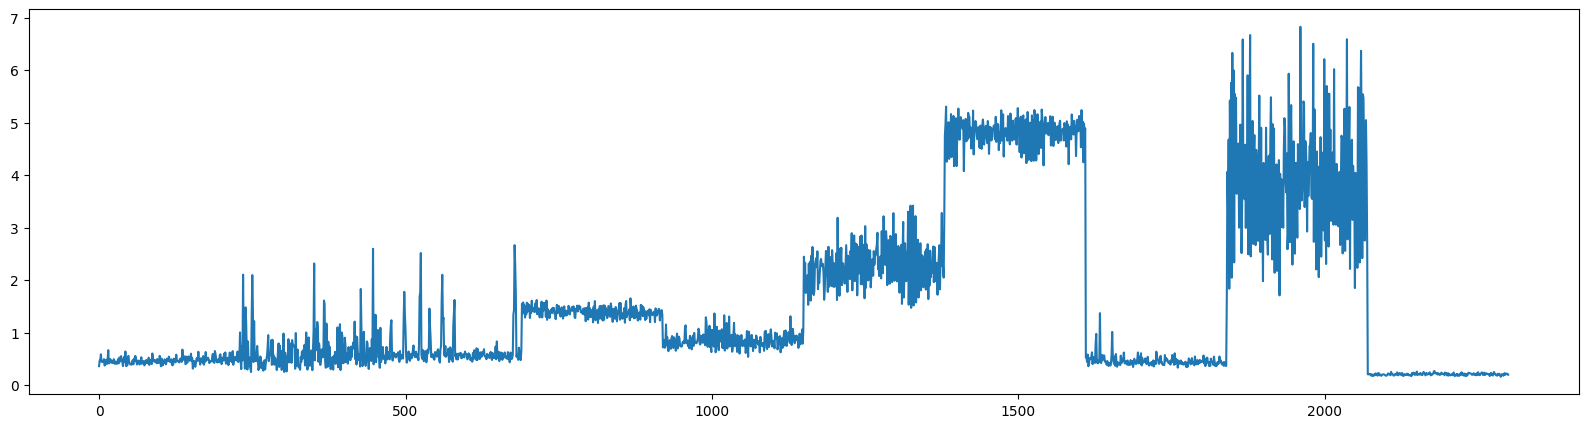

In [ ]:
plt.figure(figsize=(20,5)) 
plt.plot(df['max'])
plt.show()


In [ ]:
# 1- pure
#0 - noisy

df = df.assign(target=1)
df = df.assign(target2 = 0)

In [ ]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1,0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1,0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1,0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1,0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1,0


In [ ]:
df.dtypes

max         float64
min         float64
mean        float64
sd          float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
target        int64
dtype: object

In [ ]:
noisy_df = noisy_df.assign(target=0)
noisy_df = noisy_df.assign(target2=1)

In [ ]:
noisy_df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.515457,-0.309107,-0.091536,0.025367,0.152524,-0.169818,-0.272364,3.031527,6.758846,0,1
1,0.440194,-0.183652,0.033640,0.121355,0.028411,0.267097,0.004125,3.529901,6.050401,0,1
2,0.630763,-0.398699,-0.025985,0.320589,0.169417,0.065645,-0.226476,3.098511,7.285837,0,1
3,0.583676,-0.311749,0.090544,0.137420,0.301507,0.049784,0.068556,3.843714,7.285962,0,1
4,0.421946,-0.620416,0.096275,0.251140,0.179703,0.079783,0.434899,3.229799,6.094601,0,1


In [ ]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([df,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1,0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1,0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1,0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1,0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1,0
5,0.43726,-0.44435,0.021119,0.138763,0.140328,-0.131329,-0.168557,3.115990,6.644538,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Mixed_set = pd.DataFrame(scaler.fit_transform(Mixed_set.values), columns=Mixed_set.columns)
Mixed_set

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.060631,0.931999,0.481598,0.239993,0.214284,0.442473,0.024411,0.085772,0.011173,1.0,0.0
1,0.076300,0.941169,0.488044,0.245671,0.220611,0.569694,0.023151,0.175407,0.008221,1.0,0.0
2,0.076421,0.928954,0.485438,0.255675,0.230860,0.511409,0.016980,0.116794,0.012546,1.0,0.0
3,0.093302,0.912303,0.486153,0.259998,0.235411,0.483817,0.030082,0.207648,0.013131,1.0,0.0
4,0.073268,0.906610,0.487916,0.248994,0.224055,0.458540,0.038675,0.130809,0.009114,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,0.028908,0.967479,0.252985,0.180980,0.220481,0.406890,0.021843,0.156014,0.008149,0.0,1.0
4596,0.044001,0.952162,0.512417,0.147133,0.252352,0.433132,0.018488,0.134064,0.005951,0.0,1.0
4597,0.000000,0.963783,0.279138,0.180956,0.141542,0.445464,0.024243,0.084439,0.006420,0.0,1.0
4598,0.041142,0.962020,0.439712,0.360654,0.144939,0.412177,0.028080,0.121322,0.006145,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
frames = Mixed_set[['max', 'min','mean','sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']].values
labels = Mixed_set[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

3220
1380
3220
1380


In [ ]:
def plotUsingAutoEncoder(model,df):

  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:9]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_max = [x[0] for x in denoised_all]
  separated_min = [x[1] for x in denoised_all]
  separated_mean = [x[2] for x in denoised_all]
  separated_sd = [x[3] for x in denoised_all]
  separated_rms = [x[4] for x in denoised_all]
  separated_skewness = [x[5] for x in denoised_all]
  separated_kurtosis = [x[6] for x in denoised_all]
  separated_crest = [x[7] for x in denoised_all]
  separated_form = [x[8] for x in denoised_all]
  
  
  df['separated_max'] = pd.DataFrame(separated_max, columns=['separated_max']) 
  df['separated_min'] = pd.DataFrame(separated_min, columns=['separated_min'])
  df['separated_mean'] = pd.DataFrame(separated_mean, columns=['separated_mean']) 
  df['separated_sd'] = pd.DataFrame(separated_sd, columns=['separated_sd']) 
  df['separated_rms'] = pd.DataFrame(separated_rms, columns=['separated_rms']) 
  df['separated_skewness'] = pd.DataFrame(separated_skewness, columns=['separated_skewness']) 
  df['separated_kurtosis'] = pd.DataFrame(separated_kurtosis, columns=['separated_kurtosis']) 
  df['separated_crest'] = pd.DataFrame(separated_crest, columns=['separated_crest']) 
  df['separated_form'] = pd.DataFrame(separated_form, columns=['separated_form'])
 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['rms']].values.flatten()
  seperated = df[['separated_rms']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()

#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))

Epoch 1/300
101/101 [==============================] - 2s 6ms/step - loss: 0.6929 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4891
Epoch 2/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4888 - val_loss: 0.6926 - val_accuracy: 0.4442
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.4540 - val_loss: 0.6910 - val_accuracy: 0.4210
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4748 - val_loss: 0.6887 - val_accuracy: 0.3993
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.4217 - val_loss: 0.6850 - val_accuracy: 0.3949
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5012 - val_loss: 0.6793 - val_accuracy: 0.3601
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.4960 - val_loss: 0.6728 - val_accuracy: 0.3906

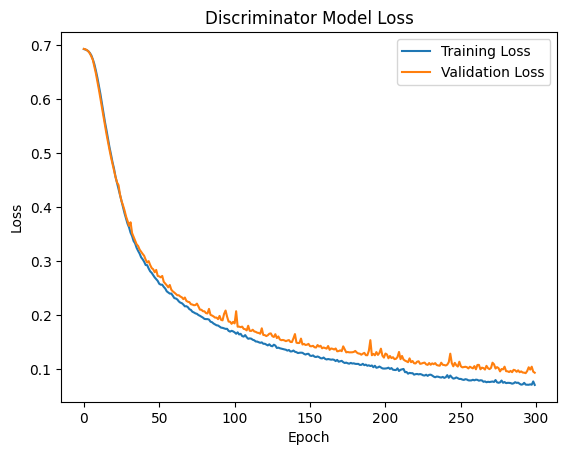

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


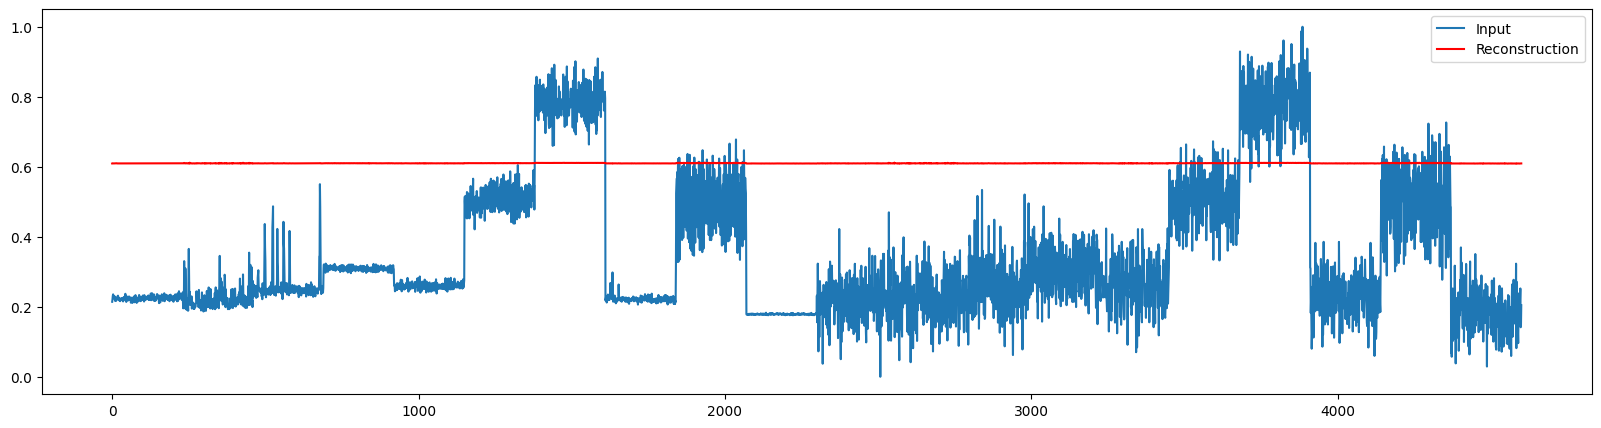

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


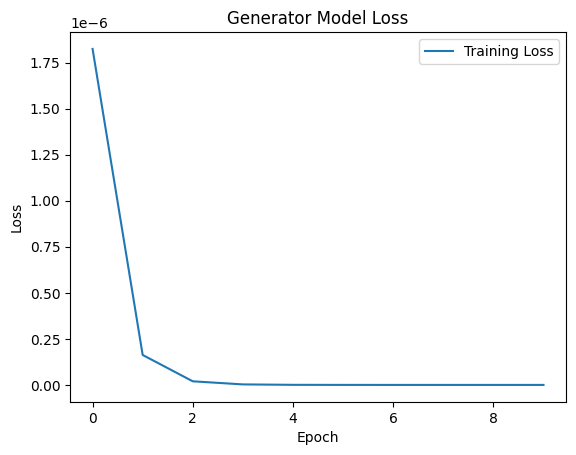

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

19.628687499601757
